# The combination of PCA and K-means algorithm
---
What is PCA and K-means?  What kind of question that you need to use this two methods together?

### PCA and K-means
---
* PCA (Principal Components Analysis)  
  
In short, this is the method to lower the dimension of a data set. As we are dealing with a certain data set, sometimes we'll face a problem that we cannot explain the data due to the high dimension issue. For example, if you have a data set X in the space of 200,000 times 200. Each row represents a sample of data set, and each column stands for the feature of the data set. No matter whether you have a correspodent label Y or let's say dependent variable, you cannot easily explain the relationship between the Y and X dataset. Therefore, the reason we use the PCA is to lower the dimension of X dataset until we can explain how X affects Y.  
  

* K-means clustering
  
Clustering is the method to calculate the distance between each points. And each clustering methods contain different ways to calculate. In the  K-means method, it is the method to calculate the distance between each points in the dataset and its mean in each clusters. Before doing the calculation, it is necessary to classify the number of clusters in the beginning. After that, it can be calculated.  


### Problem  
---
* Q1: Accourding to the characteristic of Y data set to seperate the X data set (You can see Y as X's LABEL)  
* Q2: Doing the clustering algorithm in the seperated X data set and visualizing the result  
* Q3: According to the result of clustering, making a meaningful conclusion of it  

### Solution    
This question is design by someone else, but the solution of combination of PCA and K-means is come up with by myself. If you have another brilliant idea to solve the problem, please leave your comment.

---
* A1: Seperate the X data set into two classification based on the frequency of Y data set  

In order to find out the characteristic of Y data set, I drew the figure of Y data set to observe its frequency. After I did this, I found out that the Y data set is highly concentrated into its mean, which means the kurtosis of the data set is pretty high. Besides, the shape of its frequency looks like a bell. Given my observation, I think the Y data set and its correspondent X data set could be devided into two groups. One of them are highly concentrated Y data set with its X data set. The other one is the remaining.  

Specifically, I classified the Y data set within the range of its mean plus and minus one sigma as the first classification. The remaining Y data set and its X data set belongs to the second classification.

* A2: Use PCA to lower the dimension in order to visualize the result and choose the K-means as the clustering method  

Undoubtedly, there are several ways to do the clustering, but after I considered the essence of the question and the dimension of the X data set, I thought using the K-means as the method would be appropriate. But before we do that, it is necessary to lower the dimension of X data set so that it could be visualized. When it comes to lowering dimension, the first method popped up in my mind is Principal Component Analysis. By lowering the dimension to 2-D (or 3-D), we can further do the K-means clustering to observe each clusters' relationship.
  
* A3: Make a brief conclusion  

As we can see in the following, the result of each classification (the first classification with 4 clusters and the second classification with 2 clusters) demonstrates a similiar characteristic, which is that they are devided vertically along x-axis. Because the x-axis represents the first component and y-axis represents the second component, the cluster that is far away y-axis means that it it hard to be explained by the second component.
![](https://lh3.googleusercontent.com/an29G5fNwzg59zmWKJwM08A02TyFlWOJo17jdH7zvBM6sxnXPfyeMJllkcAekYVjij9V736I9bM4Y78o_1dBEE_SyevtCXeq05RVsbpIfu0yQNyw8RWoQDWIIyTEzAP8mq1veuXSIQWJi__BF6SjcNyHOE3KZfOty8hHu8jmB89WCs3LZLpl_fhb9d-Pg0TYP40cD0KhMMqcmstSP7XmTme5nWJXFGdwFK2DQgJh30eautfM8AjxxCq9JaB4ZPfXCcuPEsB3fICVlhbctvgb6LxE68q0hLZsuQiLenHnrd_revsHwCnjmBrDg7dfgS3ZO7TopLNXJmFX1t6ADj6kx-0SiZiO35gAgsvg8ahUMYc-5_oSvLi2AmNui1pUdDrp24m0T6BMwaOkTR6nu0PDwxPiOHf4zluTSEZSoGsKIxLMFHQgFQi85DFiFqz0Nhcuns-_JlfVweJ_358qhfzc-at_eKLZeFYkxyXY49DDwDz6UbcrvWvBK4FBkEvgfudH64jJrGNwcLf74P9ZS12ewavDjaaIFqmBifiOtbQ6GUWr7RkljJARPxqN7EsumuoEfQLh8fP7__57aZ72ZLIAr5BElo1_cDg8ro0oIvVDQQ04QPFdX8O3be9KJ9WU_ak=w1152-h864-no)  



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
from numpy import linalg as LA
from numpy.linalg import inv
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors  
from sklearn.metrics import precision_recall_curve  
from sklearn.metrics import classification_report  
from sklearn.cross_validation import train_test_split 

C:\Users\Mickey\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# load the numpy dataset and simply replace NaN to zero in the original dataset

a = np.load("quizzes.npz")
a1 = a['Y']
a2 = a['X']
ys = np.nan_to_num(a1)
xs = np.nan_to_num(a2)

In [9]:
# do the first seperation according to the characteristic of Y data set

mu = np.mean(ys)
sig = np.std(ys)
fuedg = mu + sig
fledg = mu - sig
n, = ys.shape

frnk = []
srnk = []
for i in range(n):
    if ys[i] >= fledg and ys[i] <= fuedg:
        frnk.append(i)
    else:
        srnk.append(i)
        
firy = ys[frnk]
firx = xs[frnk]
seny = ys[srnk]
senx = xs[srnk]

In [10]:
# use the method of PCA to lower the dimension of the second classification into 2-D

X_scaler = StandardScaler()
nsx = X_scaler.fit_transform(senx)
pcas = PCA(n_components = 2).fit(nsx)

print (pcas.explained_variance_ratio_)
print (pcas.explained_variance_)
print (pcas.n_components_)
newMat_1 = pcas.fit_transform(nsx)
newMat_1

[ 0.53655741  0.14637096]
[ 112.67705588   30.73790168]
2


array([[ -5.16803098,  -1.49270691],
       [ -4.12402333,  -0.56349166],
       [ 10.24554542,  -1.23013542],
       ..., 
       [ -1.37160456,   1.65247105],
       [  3.1249776 ,  -0.1414707 ],
       [ -3.4366074 ,   2.28562028]])

In [11]:
# use the method of PCA to lower the dimension of the first classification into 2-D

X_scaler = StandardScaler()
nfx = X_scaler.fit_transform(firx)
pcaf = PCA(n_components = 2).fit(nfx)

print (pcaf.explained_variance_ratio_)
print (pcaf.explained_variance_)
print (pcaf.n_components_)
newMat_2 = pcaf.fit_transform(nfx)
newMat_2

[ 0.5509073   0.11593326]
[ 115.69053202   24.34598526]
2


array([[  2.9324738 ,   2.50635817],
       [  2.21406305,  -0.73234692],
       [ -7.85988847,   4.57300738],
       ..., 
       [  0.83117371,  -1.4713799 ],
       [ 12.4083361 , -14.34802484],
       [ -3.13772301,  -4.53728838]])

In [12]:
# in order to find out the appropriate K, which is the number of clustering
# here is the method to calculate the elbow point

SSE = []
for k in range(1,9):
    estimator = KMeans(n_clusters = k)
    estimator.fit(firx)
    SSE.append(estimator.inertia_)

SSE1 = []
for k in range(1,9):
    estimator = KMeans(n_clusters = k)
    estimator.fit(senx)
    SSE1.append(estimator.inertia_)


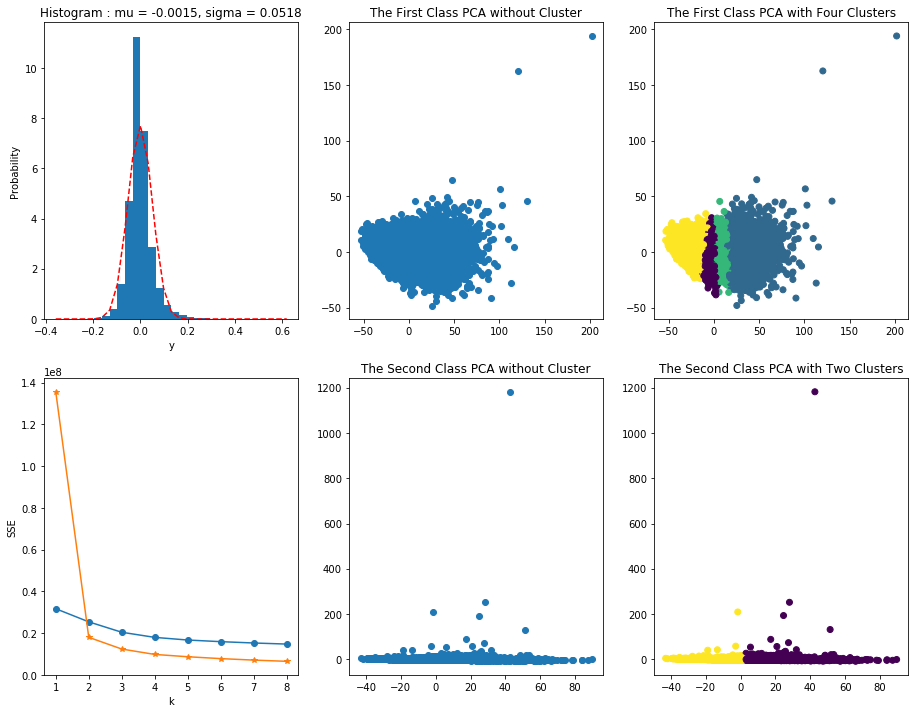

In [13]:
plt.figure(figsize=(16, 12))

# Figure (1,1) is the frequency of Y data set

plt.subplot(231)
mu = np.mean(ys)
sig = np.std(ys)
n, bins, patches = plt.hist(ys, 30, normed =1)
y = mlab.normpdf(bins, mu, sig)
plt.plot(bins, y, 'r--')
plt.xlabel('y')
plt.ylabel('Probability')
plt.title(r'Histogram : mu = -0.0015, sigma = 0.0518')
plt.subplots_adjust(left = 0.15)

# Figure (2,1) is the demonstration to show the elbow point

plt.subplot(234)
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.plot(X,SSE1,'*-')

# Figure (1,2) is what the first classification doing PCA without clustering

plt.subplot(232)
plt.scatter(newMat_2[:,0], newMat_2[:,1])
plt.title("The First Class PCA without Cluster")

# Figure (1,3) is what the first classification doing PCA with clustering

y_pred = KMeans(n_clusters=4).fit_predict(newMat_2)
plt.subplot(233)  
plt.scatter(newMat_2[:, 0], newMat_2[:, 1], c=y_pred) 
plt.title("The First Class PCA with Four Clusters")

# Figure (2,2) is what the second classification doing PCA without clustering

plt.subplot(235)
plt.scatter(newMat_1[:,0], newMat_1[:,1])
plt.title("The Second Class PCA without Cluster") 

# Figure (2,3) is what the first classification doing PCA with clustering

y_pred1 = KMeans(n_clusters=2).fit_predict(newMat_1)
plt.subplot(236)  
plt.scatter(newMat_1[:, 0], newMat_1[:, 1], c=y_pred1) 
plt.title("The Second Class PCA with Two Clusters")
plt.savefig("C:/")
plt.show()